# 09 積分

黒木玄

2018-06-21

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/09%20integration.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#積分の基本性質" data-toc-modified-id="積分の基本性質-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>積分の基本性質</a></span><ul class="toc-item"><li><span><a href="#基本性質(A)線形性,-(B)積分区間の連結,-(C)定数の積分,-(D)単調性" data-toc-modified-id="基本性質(A)線形性,-(B)積分区間の連結,-(C)定数の積分,-(D)単調性-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>基本性質(A)線形性, (B)積分区間の連結, (C)定数の積分, (D)単調性</a></span></li><li><span><a href="#性質(E)-積分の絶対値の上からの評価" data-toc-modified-id="性質(E)-積分の絶対値の上からの評価-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>性質(E) 積分の絶対値の上からの評価</a></span></li><li><span><a href="#性質(F)-微分積分学の基本定理1" data-toc-modified-id="性質(F)-微分積分学の基本定理1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>性質(F) 微分積分学の基本定理1</a></span></li><li><span><a href="#性質(G)-微分積分学の基本定理2" data-toc-modified-id="性質(G)-微分積分学の基本定理2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>性質(G) 微分積分学の基本定理2</a></span></li></ul></li><li><span><a href="#部分積分と置換積分" data-toc-modified-id="部分積分と置換積分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>部分積分と置換積分</a></span><ul class="toc-item"><li><span><a href="#置換積分" data-toc-modified-id="置換積分-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>置換積分</a></span></li><li><span><a href="#部分積分" data-toc-modified-id="部分積分-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>部分積分</a></span></li></ul></li><li><span><a href="#積分の近似" data-toc-modified-id="積分の近似-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>積分の近似</a></span><ul class="toc-item"><li><span><a href="#Riemann和" data-toc-modified-id="Riemann和-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Riemann和</a></span></li><li><span><a href="#台形公式" data-toc-modified-id="台形公式-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>台形公式</a></span></li><li><span><a href="#Simpsonの公式" data-toc-modified-id="Simpsonの公式-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Simpsonの公式</a></span></li></ul></li><li><span><a href="#広義積分" data-toc-modified-id="広義積分-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>広義積分</a></span><ul class="toc-item"><li><span><a href="#絶対収束する広義積分の例" data-toc-modified-id="絶対収束する広義積分の例-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>絶対収束する広義積分の例</a></span></li><li><span><a href="#条件収束する広義積分の例" data-toc-modified-id="条件収束する広義積分の例-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>条件収束する広義積分の例</a></span></li></ul></li><li><span><a href="#積分と極限の交換" data-toc-modified-id="積分と極限の交換-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>積分と極限の交換</a></span><ul class="toc-item"><li><span><a href="#積分と極限が交換できない場合" data-toc-modified-id="積分と極限が交換できない場合-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>積分と極限が交換できない場合</a></span></li><li><span><a href="#Dirichlet積分とその一般化" data-toc-modified-id="Dirichlet積分とその一般化-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dirichlet積分とその一般化</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## 積分の基本性質

1変数函数 $f(x)$ の積分 $\int_a^b f(x)\,dx$ の構成の仕方は無数に存在する.

Riemann積分とLebesgue積分は有名であり, それら以外にも様々な方法が存在する. 例えば, 

* S. ラング, 『ラング 現代の解析学』, 共立出版, 1981 (原書: Serge Lang, Real Analysis, 1969)

の第5章「微分法」の第1節では, 

$$
f(t) = v_i \quad (a_{i-1}<t<a_i,\ a=a_0\leqq a_1\leqq\cdots\leqq a_n=b)
$$

を満たす函数(階段函数と呼ぶことにする)の積分を

$$
\int_a^b f(t)\,dt = \sum_{i=1}^n v_i(a_i-a_{i-1})
$$

と定め, これを階段函数の一様収束先に拡張することによって, 積分を導入している. 閉区間上の連続函数は階段函数の一様収束先になっているので, 連続函数の積分もこれによって定義されることになる.

積分の構成の仕方は無数にあるが, 積分は構成の仕方によらない基本性質を持つ. だから, その基本性質のみを使って示された結果はどの積分論においても利用可能になる.

このノートでは積分の構成の仕方には深く踏み込まずに, 積分の基本性質のみを使って積分論を展開する. 

ただし, 積分の基本性質の厳密な説明を避けて, 大らかなスタイルで議論を進めることにする.

### 基本性質(A)線形性, (B)積分区間の連結, (C)定数の積分, (D)単調性

**基本性質(A)** **線形性:** 定数 $\alpha,\beta$ について

$$
\int_a^b(\alpha f(x)+\beta g(x))\,dx = \alpha\int_a^b f(x)\,dx + \beta\int_a^b g(x)\,dx.
$$

**基本性質(B)** **積分区間の連結:**

$$
\int_a^b f(x)\,dx + \int_b^c\,f(x)\,dx = \int_a^c f(x)\,dx.
$$

**注意:**

(1) (B)において $a=b=c$ と仮定すると $\int_a^a f(x)\,dx=0$ が導かれる. 

(2) (B)において $c=a$ と仮定すると $\int_b^a f(x)\,dx = - \int_a^b f(x)\,dx$ が導かれる.

(3) ゆえに $a\leqq b$ のときに $\int_a^b f(x)\,dx$ が定義されていれば, $a > b$ の場合には $\int_a^b f(x)\,dx$ を $\int_a^b f(x)\,dx = -\int_b^a f(x)\,dx$ で定義することによって, $a,b$ の大小に条件を付ける必要がなくなる.

(4) (B)は $\ds\int_a^c f(x)\,dx - \int_b^a\,f(x)\,dx = \int_b^c f(x)\,dx$ と同値である. 基本性質(B)はこの形でもよく使われる.

**基本性質(C)** **定数の積分:** 定数 $\alpha$ について,

$$
\int_a^b \alpha\,dx = \alpha(b-a).
$$

**注意:**

(1) $\int_a^b 1\,dx = b-a$ と(A)から(C)が導かれる.

(2) 函数 $f(x)$ が $a<x<b$ で一定の値 $\alpha$ の値を取るならば(すなわち $f(x)=\alpha$ ($a<x<b$)) ならば $\int_a^b f(x)\,dx = \alpha(b-a)$ となるという(C)の一般化を仮定すると, (B)と合わせて, 階段函数の積分が確定する. 

**基本性質(D)** **単調性:** $a\leqq b$ と仮定する. 1変数実数値函数 $f(x)$, $g(x)$ について

$$
f(x)\leqq g(x)\quad (a<x<b) \quad\implies\quad \int_a^b f(x)\,dx\leqq\int_a^b g(x)\,dx.
$$

### 性質(E) 積分の絶対値の上からの評価

**(E)** $a\leqq b$ と仮定する. 1変数実数値函数 $f(x)$ について

$$
\left|\int_a^b f(x)\,dx\right| \leqq \int_a^b |f(x)|\,dx.
\tag{1}
$$

さらに $a\leqq x\leqq b$ で $|f(x)|\leqq M$ ならば

$$
\left|\int_a^b f(x)\,dx\right| \leqq M|b-a|.
\tag{2}
$$

**注意:** (2)は $a>b$ であっても成立している. そのために絶対値を付けた. 

**証明:** $-|f(x)|\leqq f(x)\leqq |f(x)|$ なので積分の単調性(D)より

$$
-\int_a^b|f(x)|\,dx \leqq \int_a^b f(x)\,dx \leqq \int_a^b |f(x)|\,dx.
$$

これは(1)が成立することを意味する. $a\leqq x\leqq b$ で $|f(x)|\leqq M$ ならば積分の単調性(D)と(C)より,

$$
\int_a^b |f(x)|\,dx \leqq \int_a^b M\,dx = M(b-a)=M|b-a|.
$$

これで(2)も成立することが示された. $\QED$

**解説:** 多くの場面で「小さいこと」を示したい誤差項は積分で表わされる. (Taylorの定理における積分型剰余項はその典型例である.) 成立(E)は積分の絶対値が「小さいこと」を示すためによく使われることになる. $\QED$

**注意:** $f(x)$ が複素数値函数であっても性質(E)は成立している. さらに絶対値を任意のノルムで置き換えればベクトル値函数であっても性質(E)は成立している. しかし, そのことを示すためには性質(A)～(D)を仮定するだけでは足りないので, 複素数値函数やベクトル値函数まで拡張された性質(E)も必要ならば, 最初から拡張された性質(E)も仮定しておく方がよいかもしれない.

拡張された性質(E)が主要などの積分論でも成立する理由は, どの積分論においても積分が有限和 $v_1+\cdots+v_n$ の極限で構成されているからである. ここで $v_i$ は複素数またはベクトルである. 絶対値およびより一般にノルムは三角不等式

$$
\|v_1+\cdots+v_n\| \leqq \|v_1\|+\cdots+\|v_n\|
$$

を満たしている. これの極限として複素数値もしくはベクトル値函数 $f(x)$ についても

$$
\left\|\int_a^b f(x)\,dx\right\|\leqq \int_a^b \|f(x)\|\,dx
$$

が成立することが示される. この不等式を点の運動 $x(t)$ の速度ベクトル $v(t)=x'(t)$ に適用した結果は

$$
\|x(b)-x(a)\|=\left\|\int_a^b v(t)\,dt\right\|\leqq \int_a^b \|v(t)\|\,dt
$$

となる. 速さ $\|v(t)\|=\|x'(t)\|$ の時刻 $a$ から $b$ までの積分の値は点の運動の軌跡(曲線)の長さなので, この不等式は $x(a)$ と $x(b)$ の距離は $x(a)$ と $x(b)$ を結ぶ曲線の長さ以下になることを意味する. 

これより, ベクトル値函数に拡張された性質(E)は, 直観的には当然そうなるべき結果を意味していることがわかる.  $\QED$

### 性質(F) 微分積分学の基本定理1

**(F)** 微分積分学の基本定理1: 連続函数 $f(x)$ について

$$
\frac{d}{dx}\int_a^x f(\xi)\,d\xi = f(x).
$$

**証明:** $F(x)=\int_a^x f(\xi)\,d\xi$ とおく. このとき(B)より

$$
F(x+h)-F(x) = \int_a^{x+h}f(\xi)\,d\xi - \int_a^x f(\xi)\,d\xi = \int_x^{x+h}f(\xi)\,d\xi.
$$

さらに $f(x)$ は積分変数 $\xi$ について定数なので, (C)より

$$
f(x)h = f(x)((x+h) - x) = \int_x^{x+h} f(x)\,d\xi.
$$

ゆえに

$$
F(x+h)-F(x)-f(x)h = 
\int_x^{x+h}f(\xi)\,d\xi - \int_x^{x+h} f(x)\,d\xi =
\int_x^{x+h}(f(\xi) - f(x))\,d\xi.
$$

任意の $\eps > 0$ を取る.  $f(\xi)$ は $\xi$ の連続函数なので $|h|$ を十分に小さくすると

$$
|f(\xi)-f(x)|\leqq \eps
$$

となる(図を描いてみよ). ゆえに(E)より

$$
|F(x+h)-F(x)-f(x)h|=\left|\int_x^{x+h}(f(\xi) - f(x))\,d\xi\right|
\leqq \eps|(x+h)-x| = \eps|h|.
$$

両辺を $|h|$ で割ることによって, $\eps>0$ ごとに $|h|>0$ を十分に小さくすることによって, 

$$
\left|\frac{F(x+h)-F(x)-f(x)h}{h}\right|\leqq \eps
$$

となることわかる. これは $h\to 0$ のとき

$$
\frac{F(x+h)-F(x)}{h}-f(x) = \frac{F(x+h)-F(x)-f(x)h}{h} \to 0
$$

が成立することを意味する. これで $F'(x) = f(x)$ となることを示せた. $\QED$

**注意:** 上の証明では $\eps$-$\delta$ 論法を使った. $\eps$-$\delta$ 論法を未習もしくはまだ理解していない人であっても,  $f(x)$ のグラフを適当に描いて, 積分が「面積」を表すことを思い出しながら, 証明の各ステップに現われる積分がグラフのどの部分の「面積」になっているかを確認すれば, 直観的には明らかな議論しか行っていないことがわかるだろう.  むしろ $\eps$-$\delta$ 論法を使った証明を使いこなせるようになるためには, $\eps$-$\delta$ 論法を理解していない段階でのそのような直観的な議論を十分にしておいた方がよい. 慣れてしまえば, $\eps$-$\delta$ 論法自体が直観的に明らかな議論に見えて来ることになるだろう. $\QED$

### 性質(G) 微分積分学の基本定理2

**準備:** 微分可能函数 $f(x)$ の導函数 $f'(x)$ が恒等的に $0$ ならば $f(x)$ は定数函数になることを(G)の証明では認めて使うことにする. その結果は平均値の定理

$$
f(x) - f(a) = f'(\xi)(x-a) \quad (\xi = a+t(x-a),\ 0<t<1)
$$

を使えば容易に導かれる($\xi$ は $a$, $x$ のあいだのある実数である). $f'$ が恒等的に $0$ ならば特に $f'(\xi)=0$ となるので $f(x)=f(a)$ となり, $f(x)$ の値は $x$ の値によらず $f(a)$ に等しくなる. $\QED$

**(G)** 微分積分学の基本定理2: $F(x)$ は $C^1$ 級函数(微分可能かつ導函数が連続な函数)であるとすると, 

$$
\int_a^b F'(x)\,dx = F(b) - F(a).
\tag{1}
$$

**注意:** (1)の右辺を $[F(x)]_a^b$ と書くことが多い:

$$
[F(x)]_a^b = F(b) - F(a).
$$

**証明:** $G(x)=\int_a^x F'(\xi)\,d\xi - (F(x)-F(a))$ とおく. このとき, (B)より

$$
G(a) = \int_a^a F'(\xi)\,d\xi - (F(a)-F(a)) = 0
$$

となり, (F)より

$$
G'(x) = F'(x) - F'(x) = 0.
$$

ゆえに $G(x)$ は定数函数になり, 恒等的に $0$ になる. ゆえに

$$
0 = G(b) = \int_a^b F'(x)\,dx - (F(b)-F(a)).
$$

これは(1)が成立することを意味する. $\QED$

**以上によって, 実1変数実数値函数の微分積分学の基本定理が積分の基本性質(A)～(D)だけから導かれることがわかった.**

**注意:** 実1変数の複素数値函数もしくはベクトル値函数に関する微分積分学の基本定理は積分の基本性質(A)～(D)と拡張された性質(E)のみを使って導き出せる. 性質(A)～(E)は高校数学レベルの積分に関する直観があれば「明らか」だと感じられるシンプルな性質の集まりである. そのような「明らか」でかつシンプルな性質のみを使って微分積分学の基本定理は導出可能なのである. $\QED$

## 部分積分と置換積分

微分積分学の基本定理さえ証明できてしまえば, 部分積分と置換積分の導出は微分学の結果をそのまま積分学に応用する話に過ぎなくなる.

### 置換積分

$f(x)$, $g(t)$ は $C^1$ 級函数であると仮定し, 

$$
F(x) = \int_a^x f(\xi)\,d\xi
$$

とおく. 微分の性質

$$
\frac{d}{dt}F(g(t)) = F'(g(t))g'(t) = f(g(t))g'(t)
$$

に微分積分学の基本定理(G)を適用すると, $a=g(\alpha)$, $b=g(\beta)$ のとき, 

$$
\int_a^b f(x)\,dx = [F(x)]_a^b = [F(g(t))]_\alpha^\beta =
\int_\alpha^\beta \frac{d}{dt}F(g(t))\,dt = \int_\alpha^\beta f(g(t))g'(t)\,dt.
$$

つまり, 次が成立している.

**(H)** **置換積分:** $a=g(\alpha)$, $b=g(\beta)$ のとき,

$$
\int_a^b f(x)\,dx = \int_\alpha^\beta f(g(t))g'(t)\,dt.
$$

左辺の積分を右辺で計算することを**置換積分**と呼ぶ. $x(t)=g(t)$ とおいて,

$$
\int_a^b f(x)\,dx = \int_\alpha^\beta f(x(t))\frac{dx(t)}{dt}\,dt
$$

と書き直すと, 「分子分母の $dt$ が約分で消える公式」のように見えて見易い.

**問題:** 任意の微積分の教科書を参照して, 置換積分を使って計算する積分計算の面白い問題を見付けて, 計算練習せよ. $\QED$

### 部分積分

$f(x)$, $g(x)$ は $C^1$ 級函数であると仮定する.

微分の性質

$$
(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)
$$

に微分積分学の基本定理(G)と積分の線形性(A)を適用すると

$$
[f(x)g(x)]_a^b = \int_a^b (f(x)g(x))'\,dx = \int_a^b f'(x)g(x)\,dx + \int_a^b f(x)g'(x)\,dx.
$$

これは以下と同値である.

**(I)** **部分積分:** $f(x)$, $g(x)$ は $C^1$ 級函数であるとき, 

$$
\begin{aligned}
&
\int_a^b f'(x)g(x)\,dx = [f(x)g(x)]_a^b - \int_a^b f(x)g'(x)\,dx, 
\\ &
\int_a^b f(x)g'(x)\,dx = [f(x)g(x)]_a^b - \int_a^b f'(x)g(x)\,dx.
\end{aligned}
$$

左辺の積分を右辺で計算することを**部分積分**と呼ぶ.

**問題:** 任意の微積分の教科書を参照して, 部分積分を使って計算する積分計算の面白い問題を見付けて, 計算練習せよ. $\QED$

## 積分の近似

$a<b$ であると仮定し, $f$ は閉区間 $[a,b]$ 上の連続函数であると仮定する.

### Riemann和

閉区間 $[a,b]$ の分割 $a=x_0\leqq x_1\leqq\cdots\leqq x_N=b$ と $x_i^*\in[x_{i-1},x_i]$ と $\Delta x_i=x_i-x_{i-1}$ に対して, 和

$$
\sum_{i=1}^N f(x_i^*)\Delta x_i = \sum_{i=1}^N f(x_i^*)(x_i-x_{i-1})
$$

を**Riemann和**と呼ぶ. $\Delta x_i$ の最大値を小さくすることによって(分割を細かくすることによって), Riemann和で積分 $\int_a^b f(x)\,dx$ を幾らでも近似できることを積分の基本性質のみを使って証明しよう.

**証明:** 任意の $\eps>0$ を取る.  $f(x)$ は閉区間 $[a,b]$ 上の連続函数であると仮定してあったので, $f(x)$ は閉区間 $[a,b]$ 上の一様連続函数になる. $\Delta x_i$ 達の最大値を十分小さくすれば

$$
|f(x)-f(x_i^*)| \leqq \frac{\eps}{b-a}\quad (x_{i-1}\leqq x\leqq x_i)
$$

となる. したがって, 

$$
\begin{aligned}
\left|\sum_{i=1}^N f(x_i^*)\Delta x_i-\int_a^b f(x)\,dx\right| &=
\left|\sum_{i=1}^N \int_{x_{i-1}}^{x_i}f(x_i^*)\,dx-\sum_{i=1}^N\int_{x_{i-1}}^{x_i} f(x)\,dx\right|
\\ &=
\left|\sum_{i=1}^N \int_{x_{i-1}}^{x_i}(f(x_i^*)-f(x))\,dx\right|
\\ &\leqq
\sum_{i=1}^N \left|\int_{x_{i-1}}^{x_i}(f(x_i^*)-f(x))\,dx\right|
\\ &\leqq
\sum_{i=1}^N \int_{x_{i-1}}^{x_i}|f(x_i^*)-f(x)|\,dx
\\ &\leqq
\sum_{i=1}^N \int_{x_{i-1}}^{x_i}\frac{\eps}{b-a}\,dx =
\sum_{i=1}^N \frac{\eps}{b-a}\Delta x_i 
\\ &= 
\frac{\eps}{b-a}(b-a) = 
\eps
\end{aligned}
$$

以上によって, 閉区間 $[a,b]$ の分割を細かくすることによって, Riemann和で積分を誤差 $\eps$ 以下で近似できることを示せた. $\QED$

**定理:** 閉区間 $[a,b]$ の分割のデータ

$$
a=x_0\leqq x_1\leqq\cdots\leqq x_N=b, \quad x_i^*\in[x_{i-1},x_i], \quad \Delta x_i=x_i-x_{i-1}
$$

において, $\Delta x_i$ の最大値を $0$ に近付ける極限を, $\ds\lim_{\max\{\Delta x_i\}\searrow 0}$ と書くと, $[a,b]$ 上の連続函数 $f(x)$ について,

$$
\int_a^b f(x)\,dx = \lim_{\max\{\Delta x_i\}\searrow 0} \sum_{i=1}^N f(x_i^*)\Delta x_i
$$

が成立する. $\QED$

**注意(Riemann積分):** 積分の基本性質とは無関係に, 閉区間 $[a,b]$ 上の連続函数 $f(x)$ に対して, 極限

$$
\lim_{\max\{\Delta x_i\}\searrow 0} \sum_{i=1}^N f(x_i^*)\Delta x_i
$$

が存在することを示せる. この極限が存在するような閉区間 $[a,b]$ 上の函数は**Riemann積分可能**な函数と呼ばれ, その極限の値は**Riemann積分**と呼ばれる. 特に閉区間上の連続函数はRiemann積分可能である. そして, Riemann積分で積分を定義すると, Riemann積分可能な函数について, 積分の基本性質をすべて示すことができる. $\QED$

### 台形公式

閉区間 $[a,b]$ の分割 $a=x_0\leqq x_1\leqq\cdots\leqq x_N=b$ に対する和

$$
\sum_{i=1}^N \frac{f(x_{i-1})+f(x_i)}{2}\Delta x_i
$$

で積分 $\int_a^b f(x)\,dx$ を近似することもできる. これを**台形公式**(trapezoidal rule)と呼ぶ.

### Simpsonの公式

閉区間 $[a,b]$ の分割 $a=x_0\leqq x_1\leqq\cdots\leqq x_N=b$ に対する和

$$
\sum_{i=1}^N \frac{f(x_{i-1}) + 4\,f((x_{i-1}+x_i)/2) + f(x_i)}{6}\Delta x_i
$$

で積分 $\int_a^b f(x)\,dx$ を近似することもできる. これを**Simpsonの公式**(Simpson's rule)と呼ぶ.

**Simpsonの公式の由来:** $a<b$ であるとし, $c=(a+b)/2$ とおく. このとき, $f(a)=\alpha$, $f(c)=\gamma$, $f(b)=\beta$ を満たす2次以下の多項式 $f(x)$ が一意的に決まり, 

$$
f(x) = 
\alpha\frac{(x-b)(x-c)}{(a-b)(a-c)} + 
\beta \frac{(x-a)(x-c)}{(b-a)(b-c)} + 
\gamma\frac{(x-a)(x-b)}{(c-a)(c-b)} 
$$

と一意に表わされる. このとき,

$$
\begin{aligned}
&
\int_a^b \frac{(x-b)(x-c)}{(a-b)(a-c)}\,dx = \frac{1}{6}(b-a), 
\\ &
\int_a^b \frac{(x-b)(x-c)}{(a-b)(a-c)}\,dx = \frac{1}{6}(b-a), 
\\ &
\int_a^b \frac{(x-b)(x-c)}{(a-b)(a-c)}\,dx = \frac{4}{6}(b-a)
\end{aligned}
$$

となることを確認できるので

$$
\int_a^b f(x)\,dx = \frac{f(a)+4f((a+b)/2)+f(b)}{6}(b-a)
$$

となることがわかる.

つまり, $f(x)$ が2次函数のとき閉区間 $[a,b]$ の自明な分割 $a=a_0<a_1=b$ に関するSimpsonの公式は誤差無しで積分の値を計算する公式になっている. $\QED$

Simpsonの公式の他の解釈については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20170724EulerMaclaurin.pdf">Euler-Maclaurinの和公式の一般化</a>

の第3.5と第3.6節を参照せよ.

**問題:** 上のSimpsonの公式の由来の解説において結果だけを書いた積分計算を自分で実行せよ. $\QED$

解答略.

In [2]:
a, b, x = symbols("a b x", real=true)
c = (a+b)/2
[
    factor(simplify(integrate((x-b)*(x-c), (x, a, b)))/((a-b)*(a-c))),
    factor(simplify(integrate((x-a)*(x-c), (x, a, b)))/((b-a)*(b-c))),
    factor(simplify(integrate((x-a)*(x-b), (x, a, b)))/((c-a)*(c-b))),
]

3-element Array{SymPy.Sym,1}:
   -(a - b)/6
   -(a - b)/6
 -2*(a - b)/3

**問題:** Simpsonの公式の由来の説明に基いて, 以下の公式を導け.

$$
\int_a^b (x-a)(x-b)\,dx = -\frac{(b-a)^3}{6}, \quad
\int_a^b (x-a)\left(x-\tfrac{a+b}{2}\right)\,dx = \frac{(b-a)^3}{12}.
\qquad \QED
$$

解答略.

In [3]:
a, b, x = symbols("a b x", real=true)
c = (a+b)/2

sol = [
    integrate((x-a)*(x-b), (x,a,b)),
    integrate((x-a)*(x-c), (x,a,b)),
]
factor.(simplify.(sol))

2-element Array{SymPy.Sym,1}:
   (a - b)^3/6
 -(a - b)^3/12

**問題:** 円周率を表わす2種類の積分

$$
4\int_0^1\sqrt{1-x^2}\,dx = \pi, \quad
4\int_0^1\frac{dx}{1+x^2} = \pi
$$

の近似計算を, 閉区間 $[0,1]$ の分割 $x_i = i/N$ ($i=0,1,\ldots,N$) と $x_i^*=(x_{i-1}+x_i)/2$ に関するRiemann和と台形公式とSimpsonの公式を用いて実行してみよ. $N=10$ の場合にどうなるか? $\QED$

In [4]:
function RiemannSum(f, a, b, N)
    Δx = (b-a)/N
    sum(i->f(a+(i-1/2)*Δx)*Δx, 1:N)
end

function TrapezoidalRule(f, a, b, N)
    Δx = (b-a)/N
    sum(i->(f(a+(i-1)*Δx)+f(a+i*Δx))/2*Δx, 1:N)
end

function SimpsonRule(f, a, b, N)
    Δx = (b-a)/N
    sum(i->(f(a+(i-1)*Δx)+4f(a+(i-1/2)*Δx)+f(a+i*Δx))/6*Δx, 1:N)
end

function SymPyIntegrate(f, a, b)
    x = symbols("x", real=true)
    integrate(f(x), (x, a, b))
end

SymPyIntegrate (generic function with 1 method)

In [5]:
f(x) = 4x + 3
a, b = 0.0, 1.0
N = 10

@show RiemannSum(f, a, b, N)
@show TrapezoidalRule(f, a, b, N)
@show SimpsonRule(f, a, b, N)
@show s = SymPyIntegrate(f, Sym(0), Sym(1))
float(s)

RiemannSum(f, a, b, N) = 5.0
TrapezoidalRule(f, a, b, N) = 5.0
SimpsonRule(f, a, b, N) = 5.0
s = SymPyIntegrate(f, Sym(0), Sym(1)) = 5


5.0

In [6]:
f(x) = 2x^2 - x + 3
a, b = 0.0, 1.0
N = 10

@show RiemannSum(f, a, b, N)
@show TrapezoidalRule(f, a, b, N)
@show SimpsonRule(f, a, b, N)
@show s = SymPyIntegrate(f, Sym(0), Sym(1))
float(s)

RiemannSum(f, a, b, N) = 3.1650000000000005
TrapezoidalRule(f, a, b, N) = 3.170000000000001
SimpsonRule(f, a, b, N) = 3.166666666666667
s = SymPyIntegrate(f, Sym(0), Sym(1)) = 19/6


3.1666666666666665

In [7]:
f(x) = 4*√(1-x^2)
a, b = 0.0, 1.0
N = 10

@show RiemannSum(f, a, b, N)
@show TrapezoidalRule(f, a, b, N)
@show SimpsonRule(f, a, b, N)
@show s = SymPyIntegrate(f, Sym(0), Sym(1))
float(s)

RiemannSum(f, a, b, N) = 3.1524114332616446
TrapezoidalRule(f, a, b, N) = 3.1045183262483182
SimpsonRule(f, a, b, N) = 3.136447064257202
s = SymPyIntegrate(f, Sym(0), Sym(1)) = pi


3.141592653589793

In [8]:
f(x) = 4/(1+x^2)
a, b = 0.0, 1.0
N = 10

@show RiemannSum(f, a, b, N)
@show TrapezoidalRule(f, a, b, N)
@show SimpsonRule(f, a, b, N)
@show s = SymPyIntegrate(f, Sym(0), Sym(1))
float(s)

RiemannSum(f, a, b, N) = 3.142425985001098
TrapezoidalRule(f, a, b, N) = 3.1399259889071587
SimpsonRule(f, a, b, N) = 3.1415926529697855
s = SymPyIntegrate(f, Sym(0), Sym(1)) = pi


3.141592653589793

In [9]:
SimpsonRule(f, a, b, N) - π

-6.200076008155975e-10

$\ds 4\int_0^1\frac{dx}{1+x^2}=\pi$ の左辺を10分割のSimpsonの公式で計算すると, 小数点以下8桁まで円周率を正確に求めることができている！たったの10分割しかしていないのに！

**注意:** <a href="https://www.google.co.jp/search?q=%22%E6%95%B0%E5%80%A4%E7%A9%8D%E5%88%86%22">数値積分</a>は非常に深い分野である. 巧妙な幾つかの方法が開発されており, 多くの場合に以上で説明した方法よりもずっと効率的である. $\QED$

## 広義積分

無限区間もしくは区間 $(a,b)$ の端で発散しているかもしれない函数 $f(x)$ について極限

$$
\lim_{\alpha\searrow a,\ \beta\nearrow b} \int_\alpha^\beta f(x)\,dx
$$

を**広義積分**と呼ぶ. 極限が存在しなければ広義積分は存在しない. 広義積分は

$$
\lim_{\alpha\searrow a,\ \beta\nearrow b} \int_\alpha^\beta |f(x)|\,dx
\tag{$*$}
$$

が有限の値に収束するとき収束し, そのときその広義積分は**絶対収束**するという. もとの広義積分は収束するが, ($*$)が有限の値に収束しないとき, その広義積分は**条件収束**するという.

応用上重要な積分のかなりの割合が無限区間 $(-\infty, \infty)$, $(0,\infty)$ 上の積分になり, 有限区間 $(a,b)$ 上の積分であっても広義積分になっていることが多い.

例えば, **Gauss積分**や**Fourier変換**は無限区間 $(-\infty,\infty)$ 上の積分で定義され, **ガンマ函数**は半無限区間 $(0,\infty)$ 上の積分で定義され, **ベータ函数**は有限開区間 $(0,1)$ 上の広義積分で定義される.

**注意:** 広義積分を表すときに毎回 $\lim$ 記号を書くのは面倒なので, 通常の積分と同じ記号法で

$$
\int_a^b f(x)\,dx = \lim_{\alpha\searrow a,\ \beta\nearrow b} \int_\alpha^\beta f(x)\,dx
$$

と書くことが多い. さらに $f(x)=F'(x)$ のとき,

$$
\lim_{\alpha\searrow a,\ \beta\nearrow b}  \int_\alpha^\beta f(x)\,dx =
\lim_{\alpha\searrow a,\ \beta\nearrow b}  [F(x)]_\alpha^\beta =
\lim_{\beta\nearrow b} F(\beta) - \lim_{\alpha\searrow a}F(\alpha).
$$

であるが, これの右辺を記号の簡単のため

$$
[F(x)]_a^b = \lim_{\beta\nearrow b} F(\beta) - \lim_{\alpha\searrow a}F(\alpha)
$$

と書くことにする. $\QED$

**問題:** 積分は積分の基本性質を満たしていると仮定する. $a<\alpha\leqq\beta<b$ のとき積分 $\int_\alpha^\beta f(x)\,dx$ が定義されており, 

$$
\lim_{\alpha\searrow a,\; \beta\nearrow b}\int_\alpha^\beta |f(x)|\,dx 
$$

が有限の値に収束するならば,

$$
\lim_{\alpha\searrow a,\; \beta\nearrow b}\int_\alpha^\beta f(x)\,dx 
$$

も収束することを示せ.

**解答例:** $a$ に収束する単調減少数列 $a_n$ と $b$ に収束する単調増加数列 $b_n$ で $a_n\leqq b_n$ を満たすものを任意に取る. このとき仮定より

$$
\lim_{n\to\infty}\int_{a_n}^{b_n} |f(x)|\,dx 
$$

は有限の値に収束する. この条件のもとで

$$
\lim_{n\to\infty}\int_{a_n}^{b_n} f(x)\,dx 
$$

が収束することを示せばよい. $A_n$, $B_n$ を

$$
\begin{aligned}
&
A_1 = \int_{a_1}^{b_1}|f(x)|\,dx, & &
A_n = \int_{a_n}^{a_{n-1}}|f(x)|\,dx + \int_{b_{n-1}}^{b_n}|f(x)|\,dx & & (n\geqq 2)
\\ &
B_1 = \int_{a_1}^{b_1}f(x)\,dx, & &
B_n = \int_{a_n}^{a_{n-1}}f(x)\,dx + \int_{b_{n-1}}^{b_n}f(x)\,dx & & (n\geqq 2)
\end{aligned}
$$

と定める. このとき,

$$
|B_k|\leqq A_k, \quad
\int_{a_n}^{b_n} |f(x)|\,dx = \sum_{k=1}^n A_k, \quad
\int_{a_n}^{b_n} f(x)\,dx = \sum_{k=1}^n B_k.
$$

そして, 

$$
\sum_{k=1}^\infty |B_k| \leqq \sum_{k=1}^\infty A_k= \lim_{n\to\infty}\int_{a_n}^{b_n} |f(x)|\,dx < \infty
$$

なので, 「級数の各項の絶対値を足し上げた結果が有限の値になればもとの級数は収束する」(所謂絶対収束)という結果より, 級数 $\ds \sum_{k=1}^\infty B_k$ は収束する. それは $\ds \int_{a_n}^{b_n} f(x)\,dx$ が $n\to\infty$ で収束することを意味する.  $\QED$

**注意:** 部分積分や置換積分は極限操作に注意を払えばそのまま広義積分にも適用可能である. $\QED$

**注意:** 部分積分

$$
\int_a^b f'(x)g(x)\,dx = [f(x)g(x)]_a^b - \int_a^b f(x)g'(x)\,dx
$$

は, 特に $[f(x)g(x)]_a^b=0$ すなわち

$$
\lim_{\alpha\searrow a}f(\alpha)g(\alpha) = \lim_{\beta\nearrow b}f(\beta)g(\beta)
$$

のときに便利である. そのとき, 部分積分の公式は

$$
\int_a^b f'(x)g(x)\,dx = -\int_a^b f(x)g'(x)\,dx
$$

となる. これは $f$ の微分を $g$ に移動すると $-1$ 倍になることを意味している. 部分積分はこの形で使われることが多い. 

特に, $[f(x)g(x)]_a^b=0$ の十分条件として,

$$
\lim_{\alpha\searrow a}f(\alpha)g(\alpha) = 0, \quad
\lim_{\beta\nearrow b}f(\beta)g(\beta) = 0
$$

という条件は非常によく出て来る. $\QED$

**問題(Fourier変換):** 函数 $f(x)$ は $C^1$ 級であり, $x\to\pm\infty$ で $|f(x)|$ と $|f'(x)|$ は十分な速さで $0$ に近付くと仮定し, 

$$
\hat{f}(p) = \int_{-\infty}^\infty e^{-ipx}f(x)\,dx
$$

とおく. $\hat{f}(p)$ は $f(x)$ のFourier変換と呼ばれる. このとき

$$
(xf)^\wedge(p) =  -i\frac{\d}{\d p}\hat{f}(p), \quad
\left(-i\frac{\d}{\d x}f\right)^\wedge(p) = p\,\hat{f}(p) 
$$

が成立することを示せ. 

**解答例:** 前者は次のように示される:

$$
-i\frac{\d}{\d p}\hat{f}(p) =
-i\int_{-\infty}^\infty (-ix)e^{-ipx} f(x)\,dx =
\int_{-\infty}^\infty e^{-ipx} xf(x)\,dx = (xf)^\wedge(p).
$$

後者を示そう. この場合にはすぐ上の注意のタイプの部分積分を利用できるので, 

$$
\left(-i\frac{\d}{\d x}f\right)^\wedge(p) =
-i\int_{-\infty}^\infty e^{-ipx} \frac{\d}{\d x}f(x)\,dx =
i\int_{-\infty}^\infty (-ip)e^{-ipx} f(x)\,dx = p\hat{f}(p).
$$

2つ目の等号で部分積分を使った. $\QED$

このようにFourier変換には $x$ をかける操作と微分する操作を交換する性質を持っている.

### 絶対収束する広義積分の例

以下は絶対収束する広義積分の例である.

**(1)** $\ds \arcsin y = \int_0^y \frac{dt}{\sqrt{1-t^2}}$ なので $\ds \int_{-1}^1 \frac{dt}{\sqrt{1-t^2}} = \pi$. 積分区間 $(-1,1)$ の両端で被積分函数 $\ds\frac{1}{\sqrt{1-t^2}}$ は発散している.

**(2)** $\ds \arctan a = \int_0^a \frac{dt}{1+t^2}$ なので $\ds \int_{-\infty}^\infty \frac{dt}{1+t^2} = \pi$.  これは無限区間の積分になっている. 

以上の2つの $\pi$ は単位半円周の長さを意味する.

**(3)** $s>0$ に対するガンマ函数の定義 $\ds \Gamma(s)=\int_0^\infty e^{-x}x^{s-1}\,dx$ は無限区間の積分になっており, $0<s<1$ のとき $x\searrow 0$ で被積分函数は発散している. 

$x\to\infty$ で $e^{-x}x^{s-1}$ は急速に $0$ に近付くので $\ds \int_1^\infty e^{-x}x^{s-1}\,dx$ はどんな $s$ の値に対しても収束している. 

$s\ne 0$ のとき $\ds \int x^{s-1}\,dx = \frac{x^s}{s}$ なので $s>0$ ならば $s<1$ であっても $\ds \int_0^1 x^{s-1}\,ds=\frac{1}{s}$ (有限の値)となる. これより $s>0$ のとき $\ds \int_0^1 e^{-x}x^{s-1}\,dx$ も収束することがわかる. ($x>0$ で $e^{-x}<1$ となることに注意せよ.)

**問題:** $0<s$ のとき($s<1$ であっても), 積分 $\int_0^1 e^{-x}x^{s-1}\,dx$ が有限の値に収束することを示せ.

**解答例:** $x>0$ のとき $e^{-x}<1$ なので, $s>0$ のとき, $x\searrow 0$ で $x^s\to 0$ となることより, 

$$
\int_0^1 e^{-x}x^{s-1}\,dx \leqq \int_0^2 x^{s-1}\,dx = \left[\frac{x^s}{s}\right]_0^1 = \frac{1}{s} < \infty.
\qquad \QED
$$

**問題:** 任意の実数 $s$ に対して, 積分 $\ds \int_1^\infty e^{-x}x^{s-1}\,dx$ が有限の値に収束することを示せ.

**解答例:** 指数函数は多項式函数よりも速く増大するので, $R>1$ を十分大きくすると, $x\geqq R$ で $\ds e^{-x/2}x^{s-1}\leqq 1$ となる. ゆえに

$$
e^{-x}x^{s-1} \leqq e^{-x/2}\quad (x\geqq R).
$$

ゆえに

$$
\begin{aligned}
\int_1^\infty e^{-x}x^{s-1}\,dx &= 
\int_1^R e^{-x}x^{s-1}\,dx + \int_R^\infty e^{-x}x^{s-1}\,dx 
\\ &\leqq
\int_1^R e^{-x}x^{s-1}\,dx + \int_R^\infty e^{-x/2}\,dx
\\ &=
\int_1^R e^{-x}x^{s-1}\,dx + 2e^{-R/2} < \infty.
\qquad \QED
\end{aligned}
$$

**注意:** 指数函数部分 $e^{-x}$ を $e^{-x/2}$ と $e^{-x/2}$ に分けてその片方をもう1つの因子と比較するというような方法はよく使われる. $\QED$

**(4)** $p>0$, $q>0$ に対するベータ函数の定義 $\ds B(p,q)=\int_0^1 x^{p-1}(1-x)^{q-1}\,dx$ の被積分函数は,  $0<p<1$ ならば積分区間の左端で, $0<q<1$ ならば積分区間の右端で発散している.

しかし, $p>0$ ならば $p<1$ であっても $\ds \int_0^1 x^{p-1}\,ds=\frac{1}{p}$ (有限の値)となることから左端でも積分は収束する. 同様にして, $q>0$ ならば右端でも積分は収束する.

**(5)** $a>0$ と仮定する. $f(x)=e^{-x^2/a}$ のFourier変換

$$
\hat{f}(p) = 
\int_{-\infty}^\infty e^{-ipx} f(x)\,dx =
\int_{-\infty}^\infty e^{-x^2/a}\cos(px)\,dx
$$

の積分区間は無限区間である. $x\to\pm\infty$ で $e^{-x^2/a}$ が急速に $0$ に近付くのでこの積分は絶対収束する.

**問題(三角函数のLaplace変換):** $s>0$ と仮定する. 次の公式を示せ:

$$
\int_0^\infty e^{-st}\cos(pt)\,dt = \frac{s}{s^2+p^2}, \quad
\int_0^\infty e^{-st}\sin(pt)\,dt = \frac{p}{s^2+p^2}.
$$

**解答例1:** $\ds f(s) = \int_0^\infty e^{-st}\cos(pt)\,dt$ とおく.  $\ds \frac{\d}{\d t}\left(\frac{e^{-st}}{-s}\right)=e^{-st}$ を使った部分積分を2回行う.

$$
\begin{aligned}
f(s) &=
\int_0^\infty e^{-st}\cos(pt)\,dt =
\left[\frac{e^{-st}}{-s}\cos(pt)\right]_0^\infty -
\int_0^\infty \frac{e^{-st}}{-s}\;(-p\sin(pt))\,dt
\\ &=
\frac{1}{s} -
\frac{p}{s}\int_0^\infty e^{-st}\sin(pt)\,dt =
\frac{1}{s} -
\frac{p}{s}\left(
\left[\frac{e^{-st}}{-s}\sin(pt)\right]_0^\infty -
\int_0^\infty \frac{e^{-st}}{-s}\;p\cos(pt)\,dt
\right)
\\ &=
\frac{1}{s} -
\frac{p^2}{s^2}f(s).
\end{aligned}
$$

これを $f(s)$ について解けば前者の公式が得られる.

$\ds g(s) = \int_0^\infty e^{-st}\sin(pt)\,dt$ とおく.  上と同様にして,
$$
\begin{aligned}
g(s) &=
\int_0^\infty e^{-st}\sin(pt)\,dt =
\left[\frac{e^{-st}}{-s}\sin(pt)\right]_0^\infty -
\int_0^\infty \frac{e^{-st}}{-s}\;p\cos(pt)\,dt
\\ &=
\frac{p}{s}\int_0^\infty e^{-st}\cos(pt)\,dt =
\frac{p}{s}\left(
\left[\frac{e^{-st}}{-s}\cos(pt)\right]_0^\infty -
\int_0^\infty \frac{e^{-st}}{-s}\;(-p\sin(pt))\,dt
\right)
\\ &=
\frac{p}{s}\left(
\frac{1}{s} - \frac{p}{s}g(s)
\right).
\end{aligned}
$$

これを $g(s)$ について解けば後者の公式が得られる. $\QED$

**解答例2:** $e^{ipx}=\cos(px)+i\sin(px)$ を用いて一挙に計算する.

$$
\int_0^\infty e^{-st}e^{ipx}\,dx =
\int_0^\infty e^{-(s-ip)t}\,dx =
\left[\frac{e^{-(s-ip)t}}{-(s-ip)}\right]_0^\infty =
\frac{1}{s-ip} = \frac{s+ip}{s^2+p^2}.
$$

この結果の実部と虚部のそれぞれから示したい公式の前者と後者が得られる. $\QED$

部分積分を2回繰り返すよりも計算が圧倒的に平易になっている.

In [10]:
t, s, p = symbols("t s p", positive=true)
[
    simplify(integrate(exp(-s*t)*cos(p*t), (t,0,oo))),
    simplify(integrate(exp(-s*t)*sin(p*t), (t,0,oo)))
]

2-element Array{SymPy.Sym,1}:
 s/(p^2 + s^2)
 p/(p^2 + s^2)

### 条件収束する広義積分の例

以下は条件収束する広義積分に関する有名な公式である. 

**(1)** **Dirichlet積分**(ディリクレ積分): $\ds \int_0^\infty \frac{\sin x}{x}\,dx = \frac{\pi}{2}$.

**(2)** Dirichelet積分の一般化:

$$
\int_0^\infty \frac{e^{-ax}\sin x}{x}\,dx = 
\int_a^\infty\frac{dt}{1+t^2} = \frac{\pi}{2} - \arctan a
\quad (a\geqq 0).
$$

これはDirichlet積分になる $a=0$ の場合にのみ条件収束する.

**(3)** **Fresnel積分の特殊値**(フレネル積分の特殊値): 

$$
\int_{-\infty}^\infty \cos(t^2)\,dt = 
\int_{-\infty}^\infty \sin(t^2)\,dt = 
\sqrt{\frac{\pi}{2}}.
$$

**(4)** 上の続き. (3)における被積分函数は $t$ の偶函数なので $(0,\infty)$ 上の積分に書き直して, $t=\sqrt{x}$ と置換すると

$$
\int_0^\infty \frac{\cos x}{\sqrt{x}}\,dx = 
\int_0^\infty \frac{\sin x}{\sqrt{x}}\,dx = 
\sqrt{\frac{\pi}{2}}.
$$

これらの公式の証明については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160501StirlingFormula.pdf">ガンマ分布の中心極限定理とStirlingの公式</a>

を参照せよ. (1), (2)の証明は第5.5節とを参照せよ. (1), (3), (4)の証明は第8.6節を参照せよ.

**問題:** $\ds f(x)=\frac{\sin x}{x}$ と $\ds F(R) = \int_0^R \frac{\sin x}{x}\,dx$ のグラフをプロットせよ. $\QED$

次のセルを見よ.

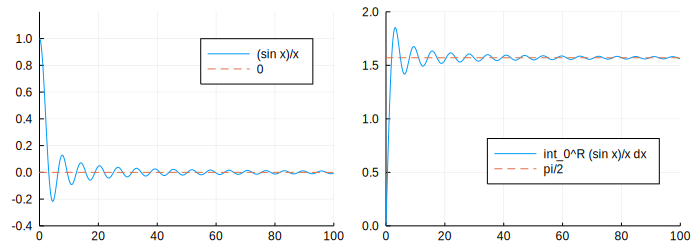

In [11]:
f(x) = iszero(x) ? one(x) : sin(x)/x
F(R) = quadgk(f, 0, R)[1]
x = 0:0.05:100
R = 0:0.05:100

P1 = plot(x, f.(x), label="(sin x)/x", legend=:topright, ylims=(-0.4, 1.2))
hline!([0], ls=:dash, label="0")
P2 = plot(R, F.(R), label="int_0^R (sin x)/x dx", legend=:bottomright, ylims=(0,2))
hline!([π/2], ls=:dash, label="pi/2")
plot(P1, P2, size=(700,250))

**問題:** $\ds\int_0^\infty \left|\frac{\sin x}{x}\right|\,dx=\infty$ を示せ.

**解答例:** $|\sin(x+\pi)|=|\sin x|$ と $\int_0^\pi \sin x\,dx = 2$ より,

$$
\begin{aligned}
\int_0^\infty \left|\frac{\sin x}{x}\right|\,dx &=
\sum_{n=1}^\infty \int_{(n-1)\pi}^{n\pi} \frac{|\sin x|}{x}\,dx \geqq
\sum_{n=1}^\infty \int_{(n-1)\pi}^{n\pi} \frac{|\sin x|}{n\pi}\,dx 
\\ &=
\sum_{n=1}^\infty \frac{1}{n\pi}\int_0^\pi \sin x\,dx =
\frac{2}{\pi}\sum_{n=1}^\infty \frac{1}{n} = \infty.
\qquad \QED
\end{aligned}
$$

**注意:** 上の解答例の計算の仕方より,

$$
\int_0^{N\pi}\left|\frac{\sin x}{x}\right|\,dx \geqq
\frac{2}{\pi}\sum_{n=1}^N\frac{1}{n} \sim \frac{2}{\pi}\log N
$$

となることがわかる.

**問題:** $\ds G(R) = \int_0^R \left|\frac{\sin x}{x}\right|\,dx$ とプロットせよ. $\QED$

次のセルを見よ.

G(π) = 1.8519370519824665


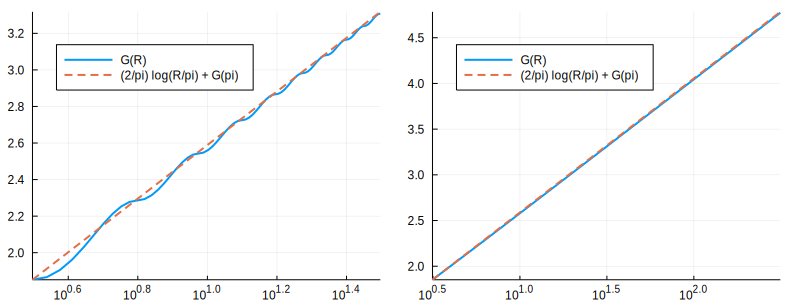

In [12]:
g(x) = abs(iszero(x) ? one(x) : sin(x)/x)
G(R) = quadgk(g, 0, R)[1]
@show G(π)

N = 1:0.1:10
R = N.*π
P1 = plot(size=(600, 300), legend=:topleft, xscale=:log)
plot!(R, G.(R), label="G(R)", lw=2)
plot!(R, @.(2/π*log(R/π)+G(π)), label="(2/pi) log(R/pi) + G(pi)", ls=:dash, lw=2)

N = 1:100
R = N.*π
P2 = plot(size=(600, 300), legend=:topleft, xscale=:log)
plot!(R, G.(R), label="G(R)", lw=2)
plot!(R, @.(2/π*log(R/π)+G(π)), label="(2/pi) log(R/pi) + G(pi)", ls=:dash, lw=2)

plot(P1, P2, size=(800, 300))

**Fresnel積分:** 次の不定積分をFresnel積分と呼ぶ:

$$
C(t) = \int_0^t \cos(s^2)\,ds, \quad S(t) = \int_0^t \sin(s^2)\,ds.
$$

上で紹介したように, 条件収束する広義積分の例として, 

$$
\lim_{t\to^\infty}C(t)=
\lim_{t\to^\infty}S(t)=
\frac{1}{2}\sqrt{\frac{\pi}{2}}
$$

は有名である. $C'(t)^2+S'(t)^2=1$ なので点 $(C(t),S(t))$ の運動の速さは常に $1$ である. だから時刻 $0$ から $t$ までの軌跡の長さは $t$ に等しい.  だから軌跡の長さは $t\to\infty$ で無限大に発散する. 無限に長い軌跡の最終到着地点が $a=(1/2)\sqrt{\pi/2}$ に対する点 $(a,a)$ になる.

Fresnel積分 $C(t),S(t)$ のそれぞれをプロットすると以下のようになる. それらが $t\to\infty$ で $a=(1/2)\sqrt{\pi/2}$ に収束する様子も確認できる.

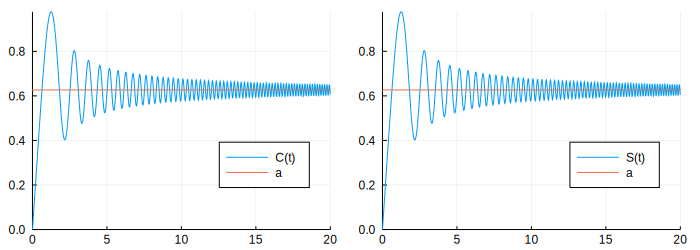

In [13]:
C(t) = quadgk(s->cos(s^2), 0, t)[1]
S(t) = quadgk(s->sin(s^2), 0, t)[1]
a = sqrt(π/2)/2

PP = []

tmin, tmax = 0, 20
t = tmin:(tmax-tmin)/1000:tmax
PC = plot(t, C.(t), label="C(t)"); hline!([a], label="a")
PS = plot(t, C.(t), label="S(t)"); hline!([a], label="a")
push!(PP, PC, PS)

plot(PP..., size=(700, 250), legend=:bottomright)

次のセルで $(C(t),S(t))$ の軌跡をプロットしてみよう.

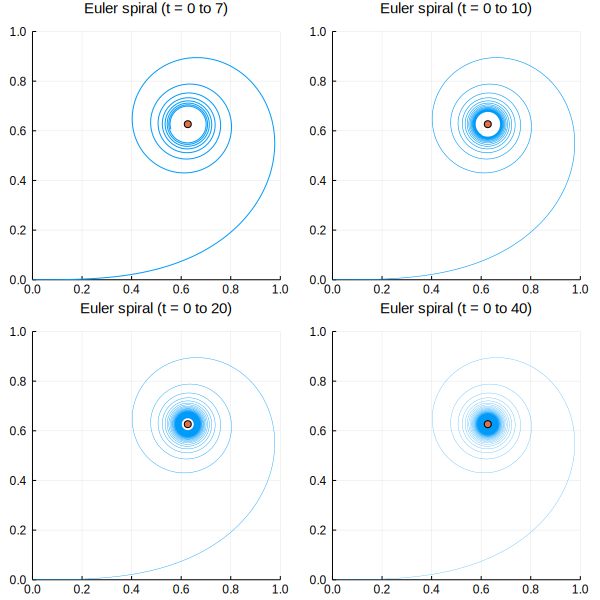

In [14]:
C(t) = quadgk(s->cos(s^2), 0, t)[1]
S(t) = quadgk(s->sin(s^2), 0, t)[1]
a = sqrt(π/2)/2

P = []
for (lw, tmax) in [(1,7), (0.6,10), (0.4,20), (0.25,40)]
    t = 0:0.01:tmax
    p = plot(xlims=(0,1), ylims=(0,1), legend=false)
    plot!(title="Euler spiral (t = 0 to $tmax)", titlefontsize=10)
    plot!(C.(t), S.(t), lw=lw)
    scatter!([a],[a])
    push!(P, p)
end
plot(P..., size=(600, 600))
#pngplot(P..., size=(600, 600))

In [15]:
x = symbols("x", positive=true)
integrate(x^(-1)*sin(x), (x,0,oo))

pi
--
2 

In [16]:
a, x = symbols("a, x", positive=true)
integrate(exp(-a*x)*x^(-1)*sin(x), (x,0,oo))

           pi
-atan(a) + --
           2 

In [17]:
x = symbols("x", positive=true)
[
    integrate(cos(x^2), (x,-oo,oo)),
    integrate(sin(x^2), (x,-oo,oo))
]

2-element Array{SymPy.Sym,1}:
 sqrt(2)*sqrt(pi)/2
 sqrt(2)*sqrt(pi)/2

In [18]:
x = symbols("x", positive=true)
[
    integrate(x^(-Sym(1)/2)*cos(x), (x,0,oo)),
    integrate(x^(-Sym(1)/2)*sin(x), (x,0,oo))
]

2-element Array{SymPy.Sym,1}:
 sqrt(2)*sqrt(pi)/2
 sqrt(2)*sqrt(pi)/2

**問題:** $a>0$ のとき, 広義積分

$$
\int_1^\infty \frac{\sin x}{x^a}\,dx = \lim_{R\to\infty}\int_1^R \frac{\sin x}{x^a}\,dx
$$

が収束することを示せ. 

**解答例:** 部分積分によって

$$
\begin{aligned}
\int_1^R \frac{\sin a}{x^a}\,dx &= 
\int_1^R x^{-a}(-\cos x)'\,dx 
\\ &=
[-x^{-a}\cos x]_1^R -\int_1^R (x^{-a})'(-\cos x)\,dx
\\ &=
-R^{-a}\cos R+\cos 1 - a\int_1^R x^{-a-1}\cos x\,dx.
\end{aligned}
$$

第1項の $-R^{-a}\cos R$ は $R\to\infty$ で $0$ に収束し, 第3項の積分は

$$
\int_1^R |x^{-a-1}\cos x|\,dx \leqq
\int_1^R x^{-a-1}\,dx =
\left[\frac{x^{-a}}{-a}\right]_1^R =
\frac{1-R^{-a}}{a}
$$

なので $R\to\infty$ で絶対収束する. これで示すべきことがすべて示された. $\QED$

**解説:** 
$$
\int_1^R x^{-a}\,dx = \begin{cases}
\dfrac{1-R^{1-a}}{1-a} & (a\ne 1) \\
\log R & (a=1)
\end{cases}
$$

なので, $a\leqq 1$ のとき, この積分は $R\to\infty$ で無限大に発散する. しかし, $x^{-a}$ を微分すると, $-a x^{-(a+1)}$ になり, $a>0$ ならば $a+1>1$ となり, $x^{-(a+1)}$ の $1$ から $\infty$ までの積分が収束することを使える.  上の問題の解答例では, 部分積分によってそれを実現している.  絶対収束しない積分を上手に部分積分すると絶対収束する形に直せることがよくある. 部分積分はこの意味での非常に有用である. $\QED$

**問題:** $a(x)$, $b(x)$ は $x\geqq 1$ の連続函数であるとし, $A(x)=\int_1^x a(\xi)\,d\xi$ とおく. $A(x)$ は $x\geqq 1$ で有界であると仮定する: $A(x)\leqq M$ ($x\geqq 1$). さらに $b(x)$ は単調減少な $C^1$ 函数でかつ $x\to\infty$ で $b(x)\to 0$ となっていると仮定する(特に $b(x)\geqq 0$ ($x\geqq 0$) である). このとき, 広義積分

$$
\int_1^\infty a(x)b(x)\,dx = \lim_{R\to\infty}\int_1^R a(x)b(x)\,dx
\tag{1}
$$

が収束することを示せ.

**解答例:** 部分積分によって,

$$
\int_1^R a(x)b(x)\,dx = A(R)b(R) - A(1)b(1) - \int_1^R A(x) b'(x)\,dx.
\tag{2}
$$

そして, $x\geqq 1$ のとき, $|A(x)|\leqq M$ かつ $b(x)$ の単調減少性より $b'(x)\leqq 0$ なので,

$$
|A(x)b'(x)|\leqq -Mb'(x) \quad (x\geqq 1).
$$

ゆえに, $b(x)\geqq 0$ であることも使うと, 

$$
\int_1^R |A(x) b'(x)|\,dx \leqq -\int_1^R M b'(x)\,dx = M(b(1)-b(R)) \leqq M b(1) < \infty.
$$

これで, 上の(2)の右辺の積分が絶対収束することがわかった.  (2)の右辺の $A(R)b(R)$ は $R\to\infty$ のとき $b(R)\to 0$ より $0$ に収束する. これで, (1)の広義積分が収束することがわかった. $\QED$

**注意:** 上の解答例と

* 黒木玄, <a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/02%20series.ipynb">02 級数</a> の <a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/02%20series.ipynb#%E6%9D%A1%E4%BB%B6%E5%8F%8E%E6%9D%9F%E3%81%99%E3%82%8B%E8%A4%87%E7%B4%A0%E7%B4%9A%E6%95%B0%E3%81%AE%E4%BE%8B">2.2  条件収束する複素級数の例</a>

にある「例の解説のための一般論」を比較してみよ.  積分と和の違いに過ぎず, 本質的には同じ内容であることがわかる. $\QED$

## 積分と極限の交換

このノートを含む一連のノート群では安全な極限の交換しか扱わない.

読者は積分と極限の交換, 積分と微分の交換, 積分順序の交換などを形式的に自由にできることを認めて読んで欲しい.

もしくは以下の結果が証明抜きで自由に使用されると考えてもよい.

**(J)** **積分の順序交換:** $\ds\int_a^b\left(\int_c^d |f(x,y)| \,dy\right)\,dx < \infty$ ならば

$$
\int_a^b\left(\int_c^d f(x,y) \,dy\right)\,dx = \int_c^d\left(\int_a^b f(x,y) \,dx\right)\,dy.
$$

**(K)** **積分記号化での微分:** 各パラメーター $\alpha$ について $\int_a^b|f(\alpha,x)|\,dx <\infty$ であり, 各 $x\in(a,b)$ について偏導函数(偏微分に値を持つ函数)

$$
\frac{\d f(\alpha, x)}{\d\alpha} = \lim_{h\to 0}\frac{f(\alpha+h,x)-f(\alpha,x)}{h}
$$

が存在し, ある非負値函数 $\varphi(x)\geqq 0$ でかつ
$$
\int_a^b \varphi(x)\,dx<\infty, \qquad
\left|\frac{\d f(\alpha,x)}{\d\alpha}\right| \leqq \varphi(x)\quad (a<x<b)
$$

を満たすものが存在するならば,

$$
\frac{d}{d\alpha}\int_a^b f(\alpha,x)\,dx = \int_a^b \frac{\d f(\alpha,x)}{\d\alpha}\,dx.
$$

**(L)** **Lebesgue(ルベーグ)の収束定理:** 函数列 $f_n(x)$ は各点収束している(すなわち各 $x\in(a,b)$ ごとに数列 $f_n(x)$ が収束している)とし, ある非負値函数 $\varphi(x)\geqq 0$ で

$$
\int_a^b \varphi(x)\,dx <\infty
$$

を満たすものが存在すると仮定する. このとき, 

$$
\lim_{n\to\infty}\int_a^b f_n(x)\,dx = \int_a^b \lim_{n\to\infty} f_n(x)\,dx.
$$

以上は少々荒い説明の仕方になっている. 正確でかつより一般的な結果およびその証明については

* 猪狩惺, 『<a href="https://www.amazon.co.jp/dp/4000054449">実解析入門</a>』, 岩波書店, 1996

など多くの教科書に書いてある. この本は品切れで中古本にプレミア価格がついている. 大学の図書館などで借りて読めば安上がりである. その本において, (L)はp.78の定理3.23に, (K)はp.79の例3.3に, (J)のより正確な表現であるFubiniの定理はpp.120-123に書いてある.

### 積分と極限が交換できない場合

このノートを含む一連のノート群では安全な極限の交換しか行わないが, 積分と極限が交換できない例は非常に簡単に作れる. 以下を見よ.

**例(Lebesgueの収束定理の結論が成立しない場合1):** 函数列 $f_n(x)$ を

$$
f_n(x) = \begin{cases}
1/n & (0< x \leqq n) \\
0   & (\text{otherwise}) \\
\end{cases}
$$

と定める. さらに函数 $g(x)$ を

$$
g(x) = \max\{f_n(x)\}_{n=1}^\infty = \begin{cases}
1/n & (n-1<x\leqq n) \\
0   & (\text{otherwise}) \\  
\end{cases}
$$

と定める. このとき, 任意の実数 $x$ について $\ds\lim_{n\to\infty}f_n(x)= 0$ だが, $\ds\int_0^\infty f_n(x)\,dx = 1$ なので, 

$$
\ds \lim_{n\to\infty}\int_0^\infty f_n(x)\,dx=1\ne0=\int_0^\infty \lim_{n\to\infty}f_n(x)\,dx
$$

となる. そして, 

$$
\int_0^\infty g(x)\,dx = \sum_{n=1}^\infty\frac{1}{n} = \infty
$$

であることにも注意せよ. $\QED$

**問題:** 上の問題の $f_n(x)$, $g(x)$ のグラフを描け.

**解答例:** 次のセルをみよ. $\QED$

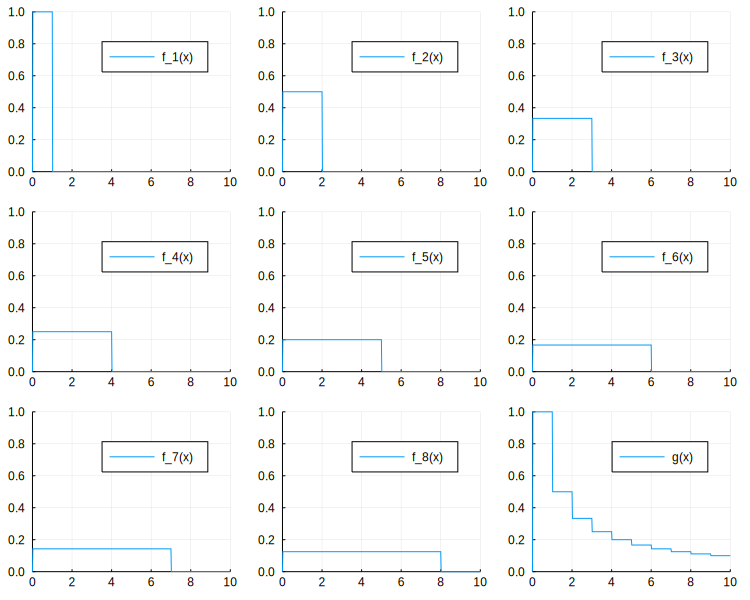

In [19]:
f(n,x) = 0 < x ≤ n ? 1/n : zero(x)
g(x) = x > 0 ? 1/ceil(x) : zero(x)
x = 0.0:0.02:10.0

P = []
for n in 1:8
    p = plot(x, f.(n,x), label="f_$n(x)")
    push!(P, p)
end
p = plot(x, g.(x), label="g(x)")
push!(P, p)
plot(P..., size=(750, 600), ylims=(0,1))
#pngplot(P..., size=(750, 600), ylims=(0,1))

### Dirichlet積分とその一般化

条件収束する広義積分に関する有名な公式

$$
\int_0^\infty \frac{\sin x}{x}\,dx = \frac{\pi}{2}
$$

の左辺はよく**Dirichlet積分**と呼ばれる.

Dirichlet積分の公式の様々な証明については以下の文献を参照せよ.

* D. H. Hardy, <a href="https://www.jstor.org/stable/3602798">The Integral $\int_0^\infty \frac{\sin x}{x}\,dx$</a>, The Mathematical Gazette Vol. 5, No. 80 (Jun. - Jul., 1909), pp. 98-103

* A. C. Dixon, <a href="https://www.jstor.org/stable/3604314">Proof That $\int_0^\infty \frac{\sin x}{x}\,dx=\frac{\pi}{2}$</a>, The Mathematical Gazette Vol. 6, No. 96 (Jan., 1912), pp. 223-224

この一連のノート群ではDirichlet積分の公式の導出を何度も繰り返し扱うが, そこで使った方法の多くはこの2つの文献で紹介されている方法の範囲に含まれている.

Dirichlet積分の公式は, ノート「<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/12%20Fourier%20analysis.ipynb">12 Fourier解析</a>」でFourier変換の逆変換の収束性に関するDiniの条件を扱うときに用いられる.

**問題:** Dirichlet積分の一般化に関する公式

$$
\int_0^\infty \frac{e^{-ax}\sin x}{x}\,dx = \int_a^\infty \frac{dt}{1+t^2} = \frac{\pi}{2} - \arctan a
\quad (a\geqq 0)
$$

を $a>0$ の場合について示せ.

**注意:** 上の問題の公式の $a\searrow 0$ の極限としてDirichlet積分の公式が得られる.

**解答例1:** $a>0$ と仮定し, $\ds I(a) = \int_0^\infty \frac{e^{-ax}\sin x}{x}\,dx$ とおく.

$a\to\infty$ で $I(a)\to 0$ である($I(\infty)=0$ とおく). 積分記号化での微分(K)と上の方にある三角函数のLaplace変換の問題の結果より

$$
I'(a) = \int_0^\infty \frac{\d}{\d a}\frac{e^{-ax}\sin x}{x}\,dx = -\int_0^\infty e^{-ax}\sin x\,dx =
\frac{-1}{1+a^2}.
$$

ゆえに

$$
I(a) = I(\infty) + \int_\infty^a \frac{-1}{1+t^2}\,dt = \int_a^\infty \frac{dt}{1+t^2}.
$$

さらに

$$
\int_a^\infty \frac{dt}{1+t^2} = 
\int_0^\infty \frac{dt}{1+t^2} - \int_0^a \frac{dt}{1+t^2} =
\frac{\pi}{2} - \arctan a.
$$

これで示すべきことがすべて示された. $\QED$

**解答例2:** $a>0$ であると仮定する. $x>0$ のとき, $\ds \frac{e^{-ax}}{x} = \int_a^\infty e^{-tx}\,dt$ なので

$$
\int_0^\infty \frac{e^{-ax}\sin x}{x}\,dx =
\int_0^\infty \left(\int_a^\infty e^{-tx}\sin x\,dt\right)\,dx.
$$

積分の順序交換(J)によって, 

$$
\int_0^\infty \left(\int_a^\infty e^{-tx}\sin x\,dt\right)\,dx =
\int_a^\infty \left(\int_0^\infty e^{-tx}\sin x\,dx\right)\,dt.
$$

上の方の三角函数のLaplace変換の問題の結果より,

$$
\int_a^\infty \left(\int_0^\infty e^{-tx}\sin x\,dx\right)\,dt =
\int_a^\infty \frac{1}{1+t^2}\,dt.
$$

これで $a>0$ の場合の公式(2)が示された. $\QED$

**注意:** $a>0$ の場合には絶対収束する積分しか出て来ないので積分順序を自由に交換できて簡単である. $a=0$ の場合にも積分順序の交換が可能なことを示せれば $a=0$ の場合の(1)も証明される.  $\QED$

**問題(次の問題の解答例1のための準備):** 次の公式を示せ: $t>0$ のとき,

$$
\int e^{-tx} \sin x\,dx = \frac{-e^{-tx}}{1+t^2}(t\cos x-\sin x), \quad
\int e^{-tx} \sin x\,dx = \frac{-e^{-tx}}{1+t^2}(t\sin x+\cos x).
$$

**解答例:** 
$$
\begin{aligned}
\int e^{-tx}e^{ix}\,dx &= 
\int e^{-(t-i)x}\,dx =
\frac{e^{-(t-i)x}}{-(t-i)} =
-\frac{t+i}{t^2+1}e^{-tx}(\cos x+i\sin x) 
\\ &=
\frac{-e^{-tx}}{1+t^2}((t\cos x-\sin x) + i(t\sin x+\cos x)).
\end{aligned}
$$

この等式の両辺の実部と虚部が示すべき公式にちょうどなっている. $\QED$

この問題の結果より, $t>0$ のとき, 

$$
\begin{aligned}
&
\int_0^R e^{-tx}\cos x\,dx = \frac{-e^{-tR}}{1+t^2}(t\cos R-\sin R) + \frac{t}{1+t^2},
\\ &
\int_0^R e^{-tx}\sin x\,dx = \frac{-e^{-tR}}{1+t^2}(t\sin R+\cos R) + \frac{1}{1+t^2}.
\end{aligned}
$$

In [20]:
t, x = symbols("t x", positive=true)
[
    factor(integrate(exp(-t*x)*cos(x), x)),
    factor(integrate(exp(-t*x)*sin(x), x))
]

2-element Array{SymPy.Sym,1}:
 -(t*cos(x) - sin(x))*exp(-t*x)/(t^2 + 1)
 -(t*sin(x) + cos(x))*exp(-t*x)/(t^2 + 1)

**問題:** Dirichlet積分の公式

$$
\int_0^\infty \frac{\sin x}{x}\,dx = \lim_{R\to\infty}\int_0^R\frac{\sin x}{x}\,dx = \frac{\pi}{2}
$$

を示せ. (1つ目の等号は広義積分の定義であり, 示す必要はない.)

**解答例1:** $R>0$ であるとする. $x>0$ のとき, $\ds \frac{1}{x} = \int_0^\infty e^{-tx}\,dt$ なので

$$
\int_0^R \frac{\sin x}{x}\,dx =
\int_0^R \left(\int_0^\infty e^{-tx}\sin x\,dt\right)\,dx.
$$

積分の順序交換(J)によって

$$
\int_0^R \frac{\sin x}{x}\,dx =
\int_0^\infty \left(\int_0^R e^{-tx}\sin x\,dx\right)\,dt.
$$

すぐ上の問題の結果より, 

$$
\int_0^R \frac{\sin x}{x}\,dx =
\int_0^\infty\frac{-e^{-tR}}{1+t^2}(t\sin R+\cos R)\,dt + 
\int_0^\infty \frac{dt}{1+t^2}.
$$

右辺の前者の積分は $R\to\infty$ で $0$ に収束し, 後者の積分は $\pi/2$ に等しいので,

$$
\int_0^\infty \frac{\sin x}{x}\,dx =
\lim_{R\to\infty}\int_0^R \frac{\sin x}{x}\,dx =
\frac{\pi}{2}.
$$

これで公式(1)が示された. $\QED$

**解答例2:** $N$ は正の整数であるとする.

$$
\sum_{k=-N}^N e^{2\pi ikx} = e^{-2\pi iNx}\frac{e^{2\pi i(2N+1)x}-1}{e^{2\pi ix}-1} =
\frac{e^{\pi i(2N+1)x}-e^{-\pi i(2N+1)x}}{e^{\pi ix}-e^{-\pi ix}} =
\frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}
$$

なので, $N\to\infty$ のとき,

$$
\begin{aligned}
1 &= \int_{-1/2}^{1/2} \sum_{k=-N}^N e^{2\pi ikx}\,dx =
\int_{-1/2}^{1/2} \frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}\,dx =
2\int_0^{1/2} \frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}\,dx 
\\ &=
\frac{2}{\pi} \int_0^{\pi(2N+1)/2} \frac{\sin t}{(2N+1)\sin\left(\frac{t}{2N+1}\right)}\,dt
\to
\frac{2}{\pi} \int_0^\infty \frac{\sin t}{t}\,dt.
\end{aligned}
$$

4つ目の等号で $\ds x = \frac{t}{\pi(2N+1)}$ とおいた. $N\to\infty$ の極限操作では $\ds(2N+1)\sin\left(\frac{t}{2N+1}\right)\to t$ を用いた.

ゆえに $\ds \int_0^\infty \frac{\sin t}{t}\,dt = \frac{\pi}{2}$. $\QED$

**解答例2':** 上の解答例2で $N\to\infty$ での極限を雑に扱った部分を, Fourier解析におけるRiemann-Lebesgueの定理を認めて使うことによって, より正確に扱ってみよう.

$\ds\frac{1}{\sin(\pi x)} - \frac{1}{\pi x}$ は $x=0$ まで連続函数として延長され, $[-1/2,1/2]$ 上の連続函数になる. ゆえにRiemann-Lebesgueの定理より, $N\to\infty$ のとき

$$
\eps_N :=
2\int_0^{1/2} \left(\frac{1}{\sin(\pi x)} - \frac{1}{\pi x}\right)\sin(\pi(2N+1)x)\,dx \to 0.
$$

一方, $\ds x = \frac{t}{\pi(2N+1)}$ とおくと, $N\to\infty$ のとき

$$
2\int_0^{1/2} \frac{\sin(\pi(2N+1)x)}{\pi x}\,dx =
\frac{2}{\pi} \int_0^{\pi(2N+1)/2}\frac{\sin t}{t}\,dt \to 
\frac{2}{\pi} \int_0^\infty \frac{\sin t}{t}\,dt.
$$

ゆえに, $N\to\infty$ のとき, 途中まで解答例1と同様にして, 

$$
\begin{aligned}
1 &= \int_{-1/2}^{1/2} \sum_{k=-N}^N e^{2\pi ikx}\,dx =
\int_{-1/2}^{1/2} \frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}\,dx =
2\int_0^{1/2} \frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}\,dx 
\\ &=
\eps_N + 2\int_0^{1/2} \frac{\sin(\pi(2N+1)x)}{\pi x}\,dx
\to
\frac{2}{\pi} \int_0^\infty \frac{\sin t}{t}\,dt
\end{aligned}
$$

ゆえに $\ds \int_0^\infty \frac{\sin t}{t}\,dt = \frac{\pi}{2}$. $\QED$

**問題(次の問題の準備):** 次を示せ.

$$
\int_0^\infty \frac{dt}{1+t^4} = 
\int_0^\infty \frac{t^2\,dt}{1+t^4} =
\frac{\sqrt{2}\;\pi}{4}
$$

In [21]:
t = symbols("t", real=true)
[
    integrate(t^2/(t^4+1), (t,0,oo)),
    integrate(1/(t^4+1), (t,0,oo)),
]

2-element Array{SymPy.Sym,1}:
 sqrt(2)*pi/4
 sqrt(2)*pi/4

**解答例1:** $t=1/u$ とおくと,

$$
\int_0^\infty \frac{dt}{1+t^4} = \int_\infty^0 \frac{-u^{-2}\,du}{1+u^{-4}} =
\int_0^\infty \frac{u^2\,du}{u^4+1} = \int_0^\infty\frac{t^2\,dt}{1+t^4}.
$$

天下りになってしまうが, $F(t)$ を次のように定める:

$$
F(t) = \frac{\sqrt{2}}{8}\log\frac{t^2+\sqrt{2}\;t+1}{t^2-\sqrt{2}\;t+1}+
\frac{\sqrt{2}}{4}\left(
\arctan\left(\sqrt{2}\;t+1\right) + \arctan\left(\sqrt{2}\;t-1\right)
\right).
$$

これの導函数を計算すると $F'(t)=1/(1+t^4)$ となることを確認できる(かなり面倒な計算が必要になる). したがって, 

$$
\int_0^\infty \frac{dt}{1+t^4} = [F(t)]_0^\infty = F(\infty) = \frac{\sqrt{2}}{4}\pi.
\qquad\QED
$$

$1/(1+t^4)$ の原始函数の求め方については

* E. ハイラー, G. ワナー, 『<a href="https://www.amazon.co.jp/dp/4621062034">解析教程 上</a>』

の第2章(5.16)式の周辺(pp.172-174)が詳しい. $1/(1+t^4)$ の部分分数展開を使う.  下の方の解答例2の直後の問題とその解答例も見よ.

In [22]:
t = symbols("t")
r = sqrt(Sym(2))
F = r/8*log((t^2+r*t+1)/(t^2-r*t+1)) + r/4*(atan(r*t+1)+atan(r*t-1))
display(F)
simplify(diff(F, t))

LoadError: [91minvalid redefinition of constant F[39m

**解答例2:** 複素解析を使う方法. $R>0$ とし, $C_1$ は $0$ から $R$ への線分 $t$, $0\leqq t\leqq R$ であるとし, $C_2$ は $R$ から $iR$ への曲線 $Re^{i\theta}$, $0\leqq\theta\leqq\pi/2$, $C_3$ は $Ri$ から $0$ への線分であるとする. このとき, 

$$
\int_{C_3}\frac{dz}{1+z^4} = -\int_0^R\frac{d(it)}{1+(it)^4} =
-i\int_0^R \frac{dt}{1+t^4} = -i\int_{C_1}\frac{dt}{1+t^4}.
$$

$1/(1+z^4)$ の $z=e^{i\pi/4}$ における留数は

$$
\frac{1}{(e^{i\pi/4}-e^{i3\pi/4})(e^{i\pi/4}-e^{i5\pi/4})(e^{i\pi/4}-e^{i7\pi/4})} =
\frac{1}{\sqrt{2}\cdot\sqrt{2}(1+i)\cdot \sqrt{2}\;i} =
\frac{1}{2\sqrt{2}\;(1+i)i}
$$

なので, 留数定理より,

$$
\frac{2\pi i}{2\sqrt{2}\;(1+i)i} = (1-i)\int_{C_1}\frac{dz}{1+z^4} + \int_{C_2}\frac{dz}{1+z^4}.
$$

$R\to\infty$ で右辺の $C_1$ 上での積分は $\int_0^\infty dt/(1+t^4)$ に収束し, $C_2$ 上での積分は $0$ に収束するので,

$$
\frac{2\pi i}{2\sqrt{2}\;(1+i)i} = (1-i)\int_0^\infty\frac{dt}{1+t^4}.
$$

ゆえに,

$$
\int_0^\infty\frac{dt}{1+t^4} =
\frac{2\pi}{2\sqrt{2}\cdot 2} =
\frac{\sqrt{2}\;\pi}{4}.
\qquad\QED
$$

**問題(上の解答例1で使った結果):** $1/(t^4+1)$ の原始函数を求めよ.

**解答例:** 以下, 記号の簡単のため $r=\sqrt{2}$ とおく($r^2=2$). 因数分解

$$
t^4+1 = (t^2+rt + 1)(t^2-rt+1)
$$

より, 

$$
\frac{2r}{t^4+1} = \frac{t+r}{t^2+rt+1}-\frac{t-r}{t^2-rt+1}.
$$

一般に $a>0$ のとき

$$
\int\frac{s\;ds}{s^2+a^2} = \frac{1}{2}\log(s^2+a^2), \quad
\int\frac{ds}{s^2+a^2} = \frac{1}{a}\arctan\frac{s}{a}.
$$

$t=s-r/2$ とおくと

$$
\begin{aligned}
\int\frac{t+r}{t^2+rt+1}\,dt &= \int\frac{s+r/2}{s^2+1/2}\,ds =
\frac{1}{2}\log(2s^2+1) + \arctan(rs)
\\ &=
\frac{1}{2}\log 2 + \frac{1}{2}\log(t^2+rt+1) + \arctan(rt+1).
\end{aligned}
$$

$t=s+r/2$ とおくと

$$
\begin{aligned}
-\int \frac{t-r}{t^2-rt+1}\,dt &= -\int \frac{s-r/2}{s^2+1/2}\,ds =
-\frac{1}{2}\log(2s^2+1) + \arctan(rs)
\\ &=
-\frac{1}{2}\log 2 - \frac{1}{2}\log(t^2-rt+1) + \arctan(rt-1).
\end{aligned}
$$

ゆえに

$$
2r\int\frac{dt}{t^4+1} =
\frac{1}{2}\log\frac{t^2+rt+1}{t^2-rt+1} + \arctan(rt+1) + \arctan(rt-1).
$$

したがって,

$$
\int\frac{dt}{t^4+1} = 
\frac{1}{4r}\log\frac{t^2+rt+1}{t^2-rt+1} + 
\frac{1}{2r}(\arctan(rt+1) + \arctan(rt-1)).
\qquad \QED
$$

In [23]:
s = symbols("s", real=true)
a = symbols("a", positive=true)
display(integrate(s/(s^2+a^2), s))
display(integrate(1/(s^2+a^2), s))

   / 2    2\
log\a  + s /
------------
     2      

    /s\
atan|-|
    \a/
-------
   a   

In [24]:
r, s, t = symbols("r s t", real=true)
v = sqrt(Sym(2))

A =  (t + r)/(t^2 + r*t + 1)
B = -(t - r)/(t^2 - r*t + 1)
F = expand(1/((t^2 + r*t + 1)*(t^2 - r*t + 1)))

display(A)
display(B)
display(F(r=>v))
display(simplify(A+B-2r*F)) # Verify 2r*F == A+B

# integrate A
As = simplify(simplify(A(t=>s-r/2))(r^2=>2))
intAs = integrate(s/(s^2+Sym(1)/2), s) + integrate(r/2/(s^2+Sym(1)/2), s)
intA = simplify(expand(intAs(s=>t+r/2)))
display(As)
display(simplify(intAs(r=>v)))
display(simplify(intA(r=>v)))

# integrate B
Bs = simplify(simplify(B(t=>s+r/2))(r^2=>2))
intBs = -integrate(s/(s^2+Sym(1)/2), s) + integrate(r/2/(s^2+Sym(1)/2), s)
intB = simplify(expand(intBs(s=>t-r/2)))
display(Bs)
display(simplify(intBs(r=>v)))
display(simplify(intB(r=>v)))

G = simplify((1/(2r)*(intA + intB))(r=>v))
display(G)
simplify(diff(G, t)) # Verification of dF/dt = 1/(t^4+1)

LoadError: [91minvalid redefinition of constant F[39m

**問題:** Fresnel積分の特殊値の公式

$$
\int_0^\infty \frac{\cos x}{\sqrt{x}}\,dx = 
\int_0^\infty \frac{\sin x}{\sqrt{x}}\,dx = 
\sqrt{\frac{\pi}{2}}
$$

を示せ.

**解答例:** Gauss積分の公式より, $x>0$ のとき

$$
2\int_0^\infty e^{-x t^2}\,dt = \int_{-\infty}^\infty e^{-x t^2}\,dt = \sqrt{\frac{\pi}{x}}
$$

ゆえに

$$
\int_0^\infty \frac{e^{ix}}{\sqrt{x}}\,dx =
\frac{2}{\sqrt{\pi}}\int_0^\infty\left(\int_0^\infty e^{-x t^2}e^{ix}\,dt\right)\,dx
$$

積分順序を交換すると(本当はこの部分を上の問題と同様の方法で正当化する必要がある),

$$
\frac{2}{\sqrt{\pi}}\int_0^\infty\left(\int_0^\infty e^{-x t^2}e^{ix}\,dt\right)\,dx =
\frac{2}{\sqrt{\pi}}\int_0^\infty\left(\int_0^\infty e^{-x t^2}e^{ix}\,dx\right)\,dt.
$$


三角函数のLaplace変換の問題の解答例2より, 

$$
\frac{2}{\sqrt{\pi}}\int_0^\infty\left(\int_0^\infty e^{-x t^2}e^{ix}\,dx\right)\,dt =
\frac{2}{\sqrt{\pi}}\int_0^\infty\frac{t^2+i}{t^4+1}\,dt
$$

上の問題の結果より,

$$
\frac{2}{\sqrt{\pi}}\int_0^\infty\frac{t^2+i}{t^4+1}\,dt =
\frac{2}{\sqrt{\pi}}(1+i)\frac{\sqrt{2}\;\pi}{4} =
(1+i)\sqrt{\frac{\pi}{2}}.
$$

したがって,

$$
\int_0^\infty \frac{e^{ix}}{\sqrt{x}}\,dx = (1+i)\sqrt{\frac{\pi}{2}}.
$$

両辺の実部と虚部を見れば示したい結果が得られる. $\QED$

上の解答例と本質的に同じ解答の詳しい解説が

* E. ハイラー, G. ワナー, 『<a href="https://www.amazon.co.jp/dp/4621061909">解析教程 下</a>』

の第4章の演習問題5.14(p.254, この問題はこの本の最後に載っている問題)の解答解説(pp.313-314)にある.

**注意:** 複素解析を使えばFresnel積分の特殊値の公式

$$
\int_0^\infty \cos t^2\,dt = 
\int_0^\infty \sin t^2\,dt = 
\frac{1}{2}\sqrt{\frac{\pi}{2}}
$$

を以下のように比較的容易に示すことができる. 


$R>0$ であるとし, $C_1$ は $0$ から $R$ への線分, $C_2$ は $R$ から $R e^{\pi i/4}$ への円弧, $C_3$ は $0$ から $R e^{\pi i/4}$ への線分とすると, Cauchyの積分定理より,

$$
\int_{C_3} e^{-z^2}\,dz = \int_{C_1} e^{-z^2}\,dz + \int_{C_2} e^{-z^2}\,dz.
$$

そして,

$$
\begin{aligned}
&
\int_{C_3} e^{-z^2}\,dz = \int_0^R \exp(-(e^{\pi i/4}t)^2)d(e^{\pi i/4}t)\,dt = 
e^{\pi i/4}\int_0^R e^{-it^2}\,dt,
\\ &
\int_{C_1} e^{-z^2}\,dz = \int_0^R e^{-t^2}\,dt \to \frac{\sqrt{\pi}}{2}\quad (R\to\infty),
\\ &
\int_{C_2} e^{-z^2}\,dz \to 0 \quad (R\to\infty).
\end{aligned}
$$

したがって,

$$
e^{\pi i/4} \int_0^\infty e^{-it^2}\,dt = \frac{\sqrt{\pi}}{2}.
$$

両辺に $\ds e^{-\pi i/4} = \frac{1-i}{\sqrt{2}}$ をかけると,

$$
\int_0^\infty e^{-it^2}\,dt = (1-i)\frac{1}{2}\sqrt{\frac{\pi}{2}}.
$$

$e^{-it^2}=\cos t^2 - i\sin t^2$ に注意して, 両辺の実部と虚部を比較すれば欲しい結果が得られる. $\QED$

上の複素解析を用いたFresnel積分の特殊値の導出のより詳しい解説が

* 高木貞治, 『<a href="https://www.amazon.co.jp/dp/4000051717">解析概論</a>』

の第62節の例2(pp.224-225)にある.

ガンマ函数との関連については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160501StirlingFormula.pdf">ガンマ分布の中心極限定理とStirlingの公式</a>

の第8.6節を参照せよ. 一般に, ちょっとした複素解析の利用によって, $0\leqq s<1$ のとき

$$
\int_0^\infty x^{s-1}\sin x\,dx = \Gamma(s)\sin\frac{\pi s}{2} = \Gamma(s+1)\frac{\sin(\pi s/2)}{s}
$$

となることを示せる. ($\sin(\pi s/2)/s$ の $s=0$ での値は極限を取ることによって自然に $\pi/2$ だと定義される.) これの $s=0$ の場合が $\ds\int_0^\infty\frac{\sin x}{x}\,dx=\frac{\pi}{2}$ であり, $s=1/2$ の場合が $\ds\int_0^\infty\frac{\sin x}{\sqrt{x}}\,dx = \sqrt{\frac{\pi}{2}}$ である. このように, Dirichlet積分とFresnel積分(の特殊値)はガンマ函数によって統一的に取り扱うことができる. 別々に公式を証明する必要はない.   $\QED$